# Logistic Regression

model tipe Classification (tapi namanya regression karena dia menggunakan teknik matematik regression), digunakan untuk memisahkan data menjadi kategori tertentu.

sebenarnya hasil kalkuasi model Logistic Regression berupa angka antara 0 dan 1. Secara default kita akan masukkan yang value >= 0.5 ke kategori 1 dan < 0.5 ke kategori 0 saat ada 2 kategori.

kita akan belajar lebih detail tentang cara evaluasi model tipe classification:

- confusion matrix
- classification report


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression

In [ ]:
# load data
digits = load_digits()
X, y = digits.data, digits.target

In [4]:
# digits.feature_names
# feature names nya kali ini tidak berguna karena data kita merupakan gambar jadi setiap kolom adalah data 1 pixel

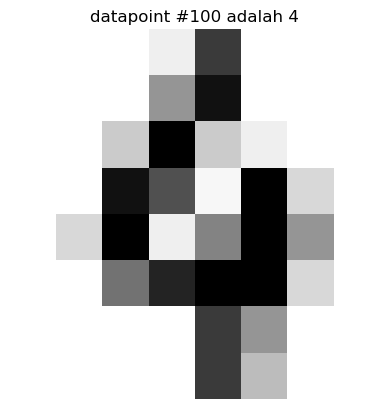

In [10]:
# ambil 1 datapoint dan visualisasi jadi gambar
n = 100
datapoint = np.array(X[n]).reshape(8, 8)
plt.imshow(datapoint, cmap="Greys")
plt.axis("off")
plt.title(f"datapoint #{n} adalah {y[n]}")
plt.show()

kita mau buat model logistic regression untuk prediksi dari gambar kita diatas (yang merupakan data numerik), angka nya apa, target nya juga sudah kita miliki


In [12]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=8)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1347, 64) (450, 64) (1347,) (450,)


In [13]:
# latih model
model_lr = LogisticRegression(max_iter=200, multi_class="multinomial")
model_lr.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'multinomial'


In [17]:
# buat prediksi
y_pred = model_lr.predict(X_test)

# evaluasi model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.89      0.98      0.93        48
           2       1.00      0.98      0.99        44
           3       1.00      0.94      0.97        51
           4       1.00      0.97      0.99        36
           5       0.96      0.96      0.96        55
           6       1.00      1.00      1.00        43
           7       0.96      1.00      0.98        48
           8       0.92      0.85      0.89        41
           9       0.93      0.95      0.94        41

    accuracy                           0.96       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



- precision: kalau model prediksi bilang kategori "A" maka berapa % adalah benar kategori "A"
- recall: kalau dari dataset yang di prediksi ada 100 kategori "A" maka berapa % dari 100 tersebut berhasil di prediksi sebagai kategori "A"
- f1-score: rata rata harmonik dari precision dan recall
- support: jumlah datapoint di kategori tersebut
- accuracy: berapa jumlah prediksi yang tepat dalam %


In [23]:
# confusion matrix
# biasanya confusion matrix dibuat lebih cantik dengan visualisasi
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 53,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  1, 35,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 39]], dtype=int64)

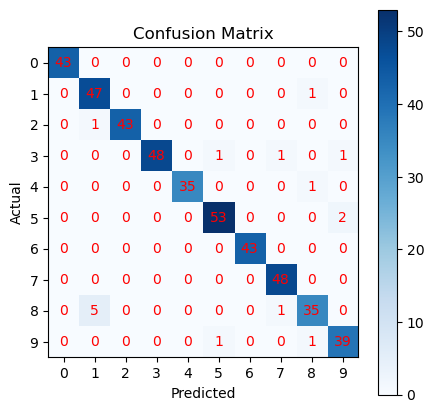

In [41]:
# buat plot kosong, ukuran nya sama dengan confusion matrix
plt.figure(figsize=(5, 5))

# add text di dalam
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i,
                 cm[i, j],
                 ha="center",
                 va="center",
                 color="red"
                 )

# buat plot nya, pilih warna
plt.imshow(cm, cmap="Blues")

# tambah label
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# sesuaiin xticks dan yticks dengan kategori
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

# tambahan colorbar
plt.colorbar()

plt.show()

# ROC AUC

Receiver Operating Characteristic

- plot dimana y-axis adalah rate True Positive
- x-axis adalah rate False Positive

Area Under Curve

- area dibawah kurva ROC


In [45]:
# buat predicted probabilites
# disini kita ambil probabilitas prediksi khusus baris pertama untuk kategori 1
y_prob = model_lr.predict_proba(X_test)[:, 2]
y_prob.shape

(450,)

In [46]:
X_test.shape

(450, 64)

predict_proba memberi kita persentase probabilitas kalau datapoint yang ini adalah kategori 1

biasanya kalau 0.5 keatas akan dimasukin ke kategori 1

dari probabilitas ini kita plot jadilah sebuah ROC curve


In [ ]:
# kita perlu hasil prediksi menjadi antara kategori 1 iya/bukan
# kita ambil dari data asli kita, filter ke yang kategori 1 True, yg lain False
# lalu kita set ke integer dimana True = 1, False = 0
y_test_is1 = (y_test == 1).astype(int)

In [53]:
# bikin ROC
fpr, tpr, thresholds = roc_curve(y_test_is1, y_prob)

In [55]:
# siapkan juga AUC
auc_score = roc_auc_score(y_test_is1, y_prob)
auc_score

0.5719838308457712

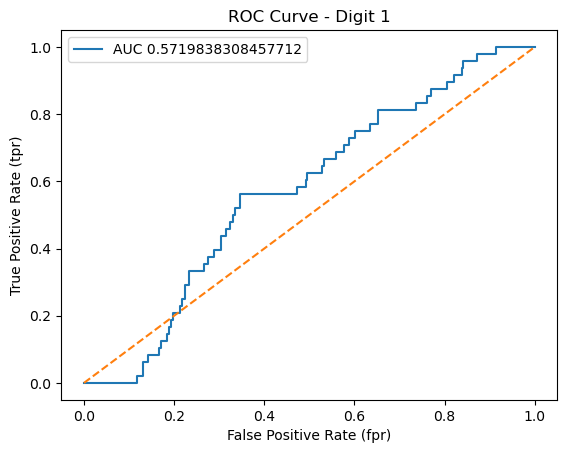

In [61]:
# plot ROC
plt.plot(fpr, tpr, label=f"AUC {auc_score}")

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.title("ROC Curve - Digit 1")
plt.legend()
plt.show()